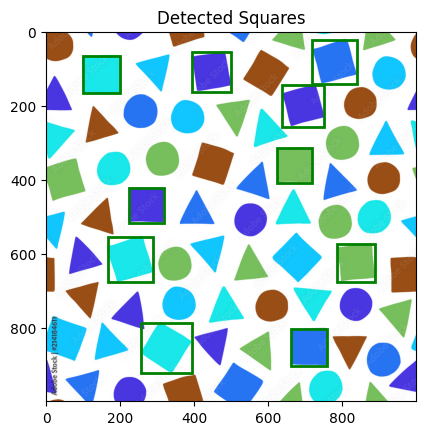

Found 10 squares.


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_squares(image_path):
    """
    Finds squares in an image using basic image processing techniques.

    Args:
        image_path: Path to the image file.

    Returns:
        A list of detected squares as tuples (x, y, width, height).
    """

    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours for squares
    squares = []
    for cnt in contours:
        # Approximate contour to a polygon
        approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)

        # Check if it's a square
        if len(approx) == 4 and cv2.contourArea(approx) > 100:
            # Calculate bounding rectangle
            x, y, w, h = cv2.boundingRect(approx)
            # Check for aspect ratio close to 1
            if abs(float(w) / h - 1) < 0.2:
                # Calculate angles of the contour
                angles = []
                for i in range(4):
                    pt1 = approx[i][0]
                    pt2 = approx[(i + 1) % 4][0]
                    pt3 = approx[(i + 2) % 4][0]

                    # Calculate angle using the dot product
                    v1 = pt2 - pt1
                    v2 = pt3 - pt2
                    angle = np.degrees(np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))))
                    angles.append(angle)

                # Check if angles are close to 90 degrees
                if all(abs(angle - 90) < 10 for angle in angles):
                    squares.append((x, y, w, h))

    # Plot the image with detected squares
    plt.imshow(img, cmap='gray')  # Use 'gray' cmap for grayscale images
    for x, y, w, h in squares:
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
        plt.gca().add_patch(rect)
    plt.title('Detected Squares')
    plt.show()

    return squares

# Example usage:
image_path = 'E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Lecture 1/Shapes_Shapes.jpg'  # Replace with your image path
squares = find_squares(image_path)
print(f'Found {len(squares)} squares.')

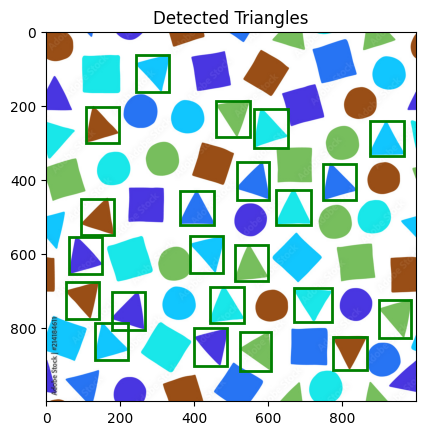

Found 22 triangles.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_triangles(image_path):
    """
    Finds triangles in an image using basic image processing techniques.

    Args:
        image_path: Path to the image file.

    Returns:
        A list of detected triangles as tuples (x, y, width, height).
    """

    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours for triangles
    triangles = []
    for cnt in contours:
        # Approximate contour to a polygon
        approx = cv2.approxPolyDP(cnt, 0.05 * cv2.arcLength(cnt, True), True) 

        # Check if it's a triangle
        if len(approx) == 3 and cv2.contourArea(approx) > 100:
            
            # Calculate bounding rectangle
            x, y, w, h = cv2.boundingRect(approx)
            # Store the triangle
            triangles.append((x, y, w, h))

    # Plot the image with detected triangles
    plt.imshow(img, cmap='gray')  # Use 'gray' cmap for grayscale images
    for x, y, w, h in triangles:
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
        plt.gca().add_patch(rect)
    plt.title('Detected Triangles')
    plt.show()

    return triangles


image_path = 'E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Lecture 1/Shapes_Shapes.jpg'  
triangles = find_triangles(image_path)
print(f'Found {len(triangles)} triangles.')

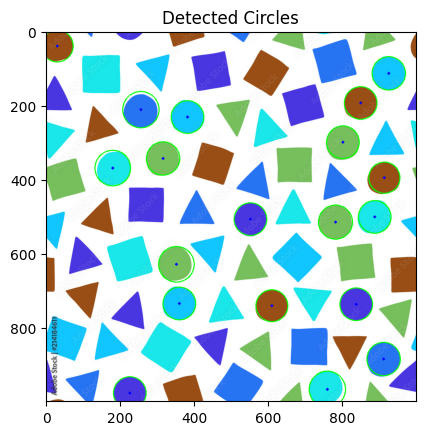

Found 19 circles.


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_circles(image_path):
    """
    Finds circles in an image using the Hough Circle Transform.

    Args:
        image_path: Path to the image file.

    Returns:
        A list of detected circles as tuples (x, y, radius).
    """

    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    # Ensure circles were found
    if circles is not None:
        circles = np.uint16(np.around(circles))
        # Draw detected circles on the original image
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

        # Plot the image with detected circles
        plt.imshow(img, cmap='gray')
        plt.title('Detected Circles')
        plt.show()

        return circles

# Example usage:
image_path = 'E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Lecture 1/Shapes_Shapes.jpg'  
circles = find_circles(image_path)
if circles is not None:
    print(f'Found {len(circles[0])} circles.')
else:
    print('No circles detected.')